In [ ]:
# default_exp matmul

# fastai_id

> API details.

In [ ]:
#export
from nbdev.showdoc import *
from fastcore.test import *

from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

## Load Data

In [ ]:
path = datasets.download_data(MNIST_URL, ext='.gz');path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [ ]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [ ]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [ ]:
assert n==y_train.shape[0]==50000
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
img = x_train[0]

In [ ]:
img.view(28,28).type()

'torch.FloatTensor'

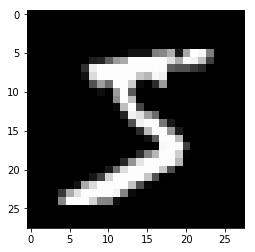

In [ ]:
plt.imshow(img.view((28,28)));

## Initial python model

In [ ]:
weights = torch.randn(28*28, 10)

In [ ]:
bias = torch.zeros(10)

### Matrix multiplication

Check here for the matrix [multiplication vizualization](matrixmultiplication.xyz)

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i][j] += a[i,k]*b[k,j]
    return c

In [ ]:
m1 = x_valid[:5];
m2 = weights

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
%time t1 = matmul(m1, m2)

CPU times: user 901 ms, sys: 3.94 ms, total: 905 ms
Wall time: 904 ms


In [ ]:
t1.shape

torch.Size([5, 10])

In [ ]:
len(x_train) * 807 / 10000

4035.0

### Elementwise operations

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i][j] = (a[i,:]*b[:,j]).sum()
    return c

In [ ]:
%timeit -n 10 _= matmul(m1, m2)

1.42 ms ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
test_close(t1, matmul(m1,m2))

### Broadcasting

In [ ]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
            '''
            c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0) OR
            '''
            c[i] = (a[i, :, None] * b).sum(dim=0)
    return c

In [ ]:
%timeit -n 10 _= matmul(m1, m2)

299 µs ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Einstein summation

In [ ]:
def matmul(a, b): return torch.einsum('ik,kj->ij', a, b)

In [ ]:
%timeit -n 10 _=matmul(m1, m2)

82.6 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### pytorch op

In [ ]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 6.51 times longer than the fastest. This could mean that an intermediate result is being cached.
23.6 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# time comparison vs pure python
839000/21

39952.380952380954

In [ ]:
t2 = m1@m2

In [ ]:
test_close(t1, t2)

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
#hide
!nbdev_build_lib
!nbdev_build_docs

Converted 01_matmul.ipynb.
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
Traceback (most recent call last):
  File "/opt/conda/envs/fastai/bin/nbdev_build_lib", line 11, in <module>
    sys.exit(nbdev_build_lib())
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/fastscript/core.py", line 73, in _f
    func(**args.__dict__)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/nbdev/cli.py", line 21, in nbdev_build_lib
    notebook2script(fname=fname)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/nbdev/export.py", line 372, in notebook2script
    for f in sorted(files): d = _notebook2script(f, silent=silent, to_dict=d)
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/nbdev/export.py", line 311, in _notebook2script
    if to_dict is None: _add2all(fname_out, [f"'{f}'" for f in names if '.' not in f and len(f) > 0] + extra)
  File "/opt/conda/envs/fastai/lib/python3.6/si